This Notebook is meant to present different VCG reconstruction algorithms.

Currently, there are three algorithms implemented: two matrix-based and one statistical.

Matrix based algorithms are _Kors_ and _Inverse Dower Transform_. Statistical algorithm is based on _Principal Component Analysis_.

In [3]:
import reconstruction
import wfdb

First, let's load sample data from PhysioNet, using `wfdb`.

In [4]:
wfdb.dldatabase('ptbdb', dlbasedir='data/', 
                records = ['patient001/s0010_re'], 
                overwrite = False)

Created local base download directory:  data/
Finished downloading files


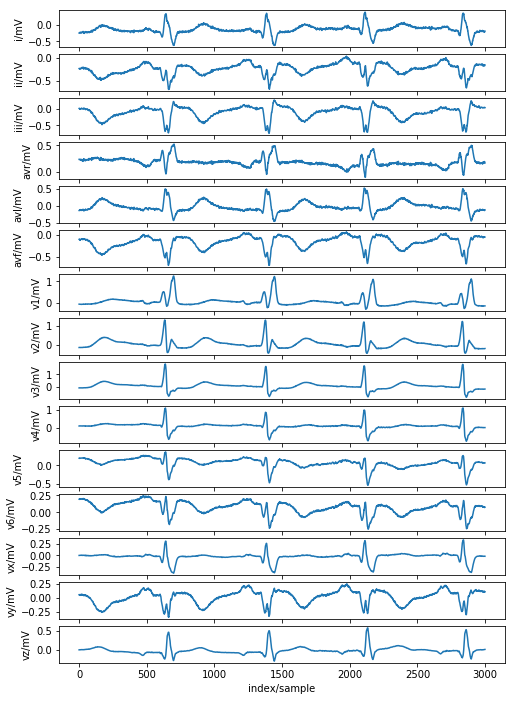

In [11]:
record = wfdb.rdsamp('data/patient001/s0010_re', sampto=3000)
wfdb.plotrec(record, figsize=(8,12))

This is a classical 12-lead ECG record. You might also notice three signals named `vx`, `vy`, `vz`. These are the vectorcardiographic leads taken from the patient using actual VCG Frank 8-lead system.

Let's focus on *them* for a moment. In `cardiovector` there is a helper function to plot VCG in 3-D. Shall we use it?

In [ ]:
import plotting